In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

housing = pd.read_csv("D:/Lern ht code/begin-python/first_analysis_Pyth/Housing.csv")
sns.set_style("whitegrid") # установил одинаковую тему для всех графиков
#housing.info()
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0}) # ЗАМЕНЯЕТ ЗНАЧЕНИЯ ДА/НЕТ НА 1/0
print(housing.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [108]:
print(housing['guestroom'].value_counts())  # Сколько 'yes' и 'no' ДО преобразования

print(housing['guestroom'].dtype)
print(housing['basement'].dtype)
print(housing['hotwaterheating'].dtype)
print(housing['airconditioning'].dtype)
print(housing['prefarea'].dtype)
print(housing[['basement', 'airconditioning']].head())


guestroom
no     448
yes     97
Name: count, dtype: int64
object
object
object
object
object
  basement airconditioning
0       no             yes
1       no             yes
2      yes              no
3      yes             yes
4      yes             yes


In [109]:
duplicates = housing.duplicated().sum()
print(duplicates) #ни одна строка не дублируется
nan = housing.isnull().sum()
print(nan) #нет значений NaN



0
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [110]:
print(housing['guestroom'].unique())
print(housing['mainroad'].unique())
print(housing['bathrooms'].unique())

['no' 'yes']
[1 0]
[2 4 1 3]


In [111]:
print(housing['guestroom'].value_counts())
print(housing['mainroad'].value_counts())
print(housing['bathrooms'].value_counts())

guestroom
no     448
yes     97
Name: count, dtype: int64
mainroad
1    468
0     77
Name: count, dtype: int64
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


In [112]:
bed_group = housing.groupby('bedrooms')
bed_group.describe()
#print(housing['price'].dtype) - int64

avg_price_by_bedrooms = bed_group['price'].mean()
print(avg_price_by_bedrooms)
avg_area_by_bedrooms = bed_group['area'].mean()

print(avg_area_by_bedrooms)
#нашёл среднюю цену для каждого количества комнат в квартире и среднюю площадь квартир



bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64
bedrooms
1    3710.000000
2    4636.235294
3    5226.620000
4    5582.063158
5    6291.500000
6    3950.000000
Name: area, dtype: float64


In [114]:
#------------------------------------------------------------
#------------------------------------------------------------
#------------------------------------------------------------
#------------------------------------------------------------
#------------------------------------------------------------
#------------------------------------------------------------

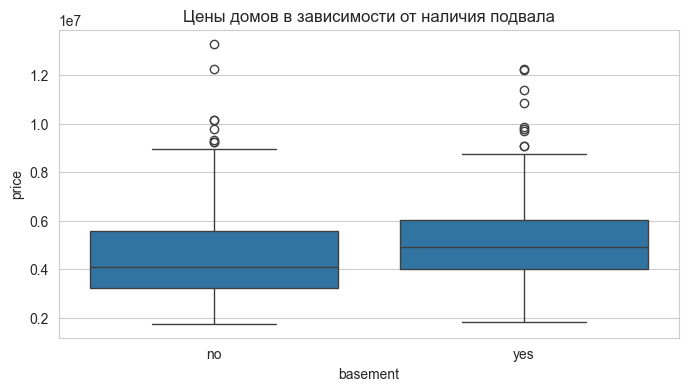

In [113]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='basement', y='price', data=housing)
plt.title('Цены домов в зависимости от наличия подвала')
plt.show()

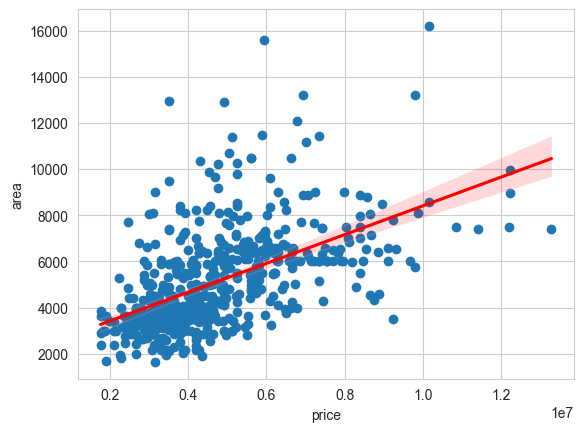

[[1.         0.53599735]
 [0.53599735 1.        ]]


In [122]:
plt.scatter(housing['price'], housing['area'])
sns.regplot(
    x='price', 
    y='area', 
    data=housing,
    scatter=False,  # не рисуем точки
    color='red',
)
plt.show()

corr_price_area = np.corrcoef(housing['price'], housing['area'])
print(corr_price_area)

# График - показывает положительную корреляцию, но она не сильная
# Функция np.corrcoef() это подтверждает, корреляция равняется 0.536

                          mean     median  count
furnishingstatus                                
furnished         5.495696e+06  5075000.0    140
semi-furnished    4.907524e+06  4585000.0    227
unfurnished       4.013831e+06  3430000.0    178


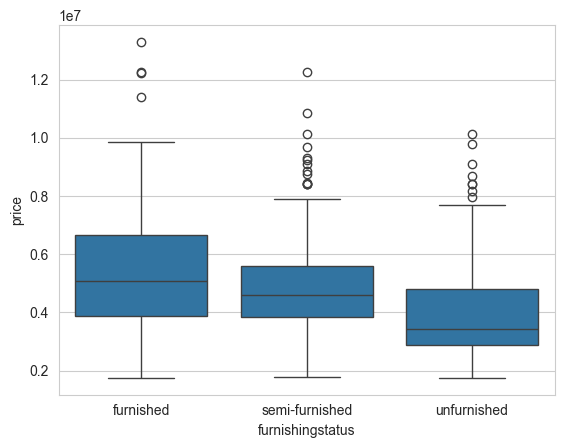

In [116]:
furnish_group = housing.groupby('furnishingstatus')
furnish_difference = furnish_group['price'].agg(['mean', 'median', 'count'])
print(furnish_difference)
sns.boxplot(data=housing, x='furnishingstatus', y='price')
plt.show()

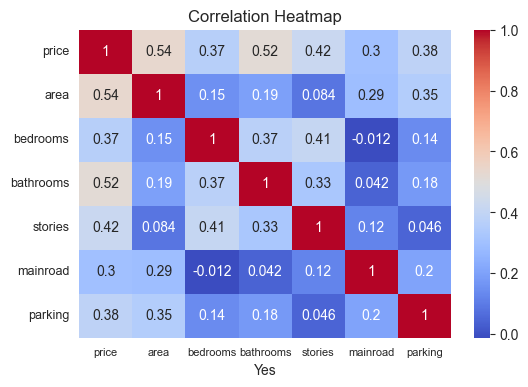

In [137]:
numeric_cols = housing.select_dtypes(include=['int64', 'float64'])
#three_to_corr = housing[['price','area','bedrooms']]

# Строим heatmap корреляций
plt.figure(figsize=(6, 4)) 
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=9)
plt.title("Correlation Heatmap")
plt.xlabel('Xes')
plt.xlabel('Yes')
plt.show()


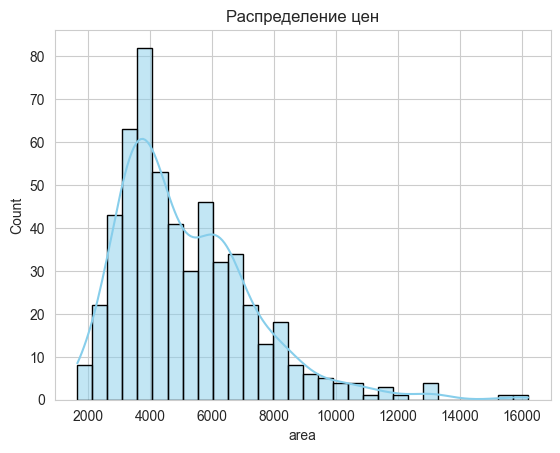

In [118]:
sns.histplot(
    data=housing,
    x='area',
    bins=30,
    kde=True,  # добавить smooth-линию
    color='skyblue',
    edgecolor='black'
)
plt.title("Распределение цен")
plt.show()

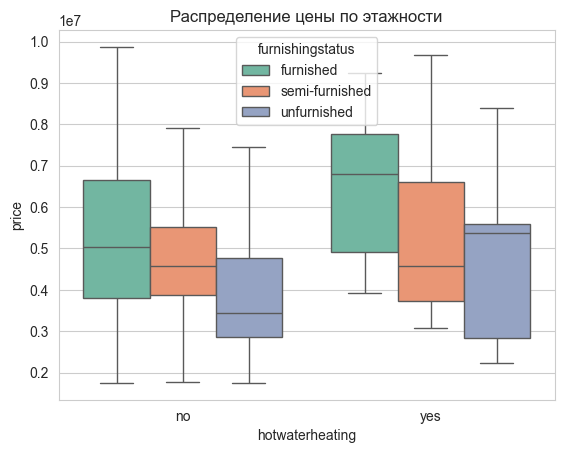

In [150]:
sns.boxplot(
    x='hotwaterheating', 
    y='price', 
    data=housing,
    hue='furnishingstatus',
    palette='Set2',
    showfliers=False  # скрыть выбросы
)
plt.title("Распределение цены по этажности")
plt.show()

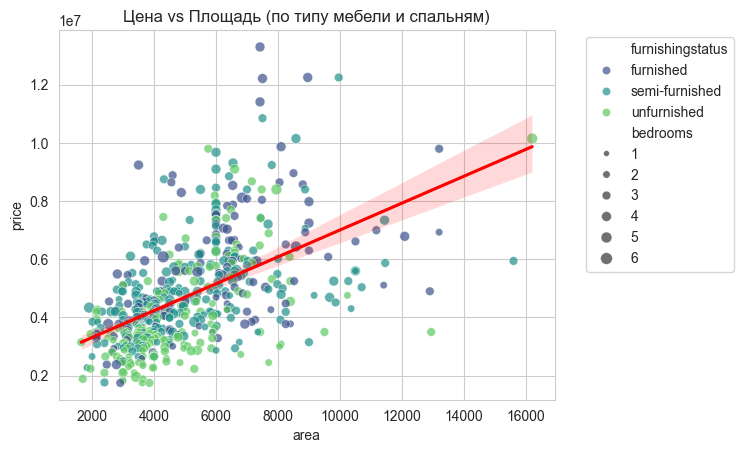

In [120]:
sns.scatterplot(
    x='area', 
    y='price', 
    data=housing,
    hue='furnishingstatus',  # цвет по категории
    palette='viridis',
    size='bedrooms',  # размер точек по кол-ву спален
    alpha=0.7,  # прозрачность
)
sns.regplot(
    x='area', 
    y='price', 
    data=housing,
    scatter=False,  # не рисуем точки
    color='red',
)

plt.title("Цена vs Площадь (по типу мебели и спальням)")
plt.legend(bbox_to_anchor=(1.05, 1))  # выносим легенду справа
plt.show()